# **Analysing Amazon Sales Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


In [ ]:
df = pd.read_csv('/content/Amazon Sales data.csv')

# **Data Exploration**

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df['Item Type']

,Item Type
0,Baby Food
1,Cereal
2,Office Supplies
3,Fruits
4,Office Supplies
...,...
95,Clothes
96,Fruits
97,Vegetables
98,Personal Care


In [ ]:
df['Item Type'].value_counts()

,count
Item Type,
Clothes,13
Cosmetics,13
Office Supplies,12
Fruits,10
Personal Care,10
Household,9
Beverages,8
Baby Food,7
Cereal,7


In [ ]:
for col in ['Region', 'Country', 'Order Priority']:
    print(f"Unique values for {col}:\n", df[col].value_counts(), "\n")

Unique values for Region:
 Region
Sub-Saharan Africa                   36
Europe                               22
Australia and Oceania                11
Asia                                 11
Middle East and North Africa         10
Central America and the Caribbean     7
North America                         3
Name: count, dtype: int64 

Unique values for Country:
 Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64 

Unique values for Order Priority:
 Order Priority
H    30
L    27
C    22
M    21
Name: count, dtype: int64 



In [ ]:
missing_values = df.isnull().sum()
print("Missing Values\n", missing_values)

Missing Values
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [ ]:
duplicate_values = df.duplicated().sum()
print('Number of duplicates', duplicate_values)

Number of duplicates 0


In [ ]:
# Convert 'Order Date' and 'Ship Date' to datetime format and extract month and year for analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extracting year and month from 'Order Date' for analysis
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

# Now let's take a look at the transformed dataset
df[['Order Date', 'Order Year', 'Order Month']].head()


,Order Date,Order Year,Order Month
0,2010-05-28,2010,5
1,2012-08-22,2012,8
2,2014-05-02,2014,5
3,2014-06-20,2014,6
4,2013-02-01,2013,2


# **KPI's**

**Revenue Based**

**1) Total Sales**

In [ ]:
total_sales = round((df['Total Revenue'].sum()/1000000),2)
print("Total Sales: $ {} M ".format(total_sales))

Total Sales: $ 137.35 M 


**2) Sales Growth Rate**

Growth Rate (%)=(Revenue in Current Period - Revenue in Previous Period) / Revenue in Previous Period) * 100


In [ ]:
# Grouping data by year and summing up the total revenue
year_wise_sales = df.groupby('Order Year')['Total Revenue'].sum()

# Calculating Year-over-Year Sales Growth Rate (%)
sales_growth_rate = year_wise_sales.pct_change() * 100

# Printing the result
print("Yearly Sales Growth Rate (%):", sales_growth_rate)


Yearly Sales Growth Rate (%): Order Year
2010           NaN
2011    -41.993372
2012    186.622055
2013    -36.265478
2014    -18.200455
2015    -25.268655
2016     -0.443480
2017      8.086666
Name: Total Revenue, dtype: float64


**3) Total Units Sold**

In [ ]:
# Calculate total units sold
total_units_sold = df['Units Sold'].sum()

# Print total units sold
print("Total Units Sold:", total_units_sold)

Total Units Sold: 512871


**4) Average Order Value (AOV)**


Total Revenue/ Total Number of Orders

In [ ]:
# Calculate total number of orders
total_orders = df['Order ID'].nunique()

# Calculate Average Order Value (AOV)
aov = total_sales / total_orders if total_orders > 0 else 0

# Print AOV
print("Average Order Value (AOV): $", aov)

Average Order Value (AOV): $ 1373487.6831


**5) Sales By Region**

In [ ]:
# Grouping by 'Region' to find total revenue
sales_by_region = df.groupby('Region')['Total Revenue'].sum()

# Print sales by region
print("Sales by Region:")
print(sales_by_region)


Sales by Region:
Region
Asia                                 21347091.02
Australia and Oceania                14094265.13
Central America and the Caribbean     9170385.49
Europe                               33368932.11
Middle East and North Africa         14052706.58
North America                         5643356.55
Sub-Saharan Africa                   39672031.43
Name: Total Revenue, dtype: float64


**6) Sales By Item Type**

In [ ]:
# Grouping by 'Item Type' to analyze revenue
sales_by_item_type = df.groupby('Item Type')['Total Revenue'].sum()

# Print sales by item type
print("Sales by Item Type:")
print(sales_by_item_type)


Sales by Item Type:
Item Type
Baby Food          10350327.60
Beverages           2690794.60
Cereal              5322898.90
Clothes             7787292.80
Cosmetics          36601509.60
Fruits               466481.34
Household          29889712.29
Meat                4503675.75
Office Supplies    30585380.07
Personal Care       3980904.84
Snacks              2080733.46
Vegetables          3089057.06
Name: Total Revenue, dtype: float64


**7) Sales Channel Performance**

In [ ]:
# Grouping by 'Sales Channel' to analyze revenue
sales_channel_performance = df.groupby('Sales Channel')[['Total Revenue', 'Total Cost']].sum()

# Print sales channel performance
print("Sales Channel Performance:")
print(sales_channel_performance)


Sales Channel Performance:
               Total Revenue   Total Cost
Sales Channel                            
Offline          79094809.20  54174082.53
Online           58253959.11  39006487.38


**8) Order Fulfillment Time**

Fulfillment Time = Ship Date - Order Date

In [ ]:
df['Fulfillment Time'] = (df['Ship Date'] - df['Order Date']).dt.days
avg_fulfillment_time = df['Fulfillment Time'].mean()
print("Avg Fulfillment Time (days):", avg_fulfillment_time, 'days' )

Avg Fulfillment Time (days): 23.36 days


**9) Total Order Counts**

In [ ]:
# Counting the total number of orders by counting the unique values in the 'Order ID' column
Total_orders = df['Order ID'].count()

# Printing the total number of orders
print("Total orders :", Total_orders)

Total orders : 100


**Cost Based**

**1) Total Cost**

In [ ]:
# Calculate total cost
total_cost = round((df['Total Cost'].sum()/1000000),2)

# Print the total cost
print("Total Cost: $ {}M".format(total_cost))

Total Cost: $ 93.18M


**2) Cost of Goods Sold (COGS)**

In [ ]:
# Calculate Cost of Goods Sold (COGS)
cogs = round(((df['Unit Cost'] * df['Units Sold']).sum()/1000000),2)

# Print COGS
print("Cost of Goods Sold (COGS): $ {}M".format(cogs))

Cost of Goods Sold (COGS): $ 93.18M


**3) Total Profit**

In [ ]:
# Calculate total profit
total_profit = round((df['Total Profit'].sum()/1000000),2)

# Print total profit
print("Total Profit: $ {} M".format(total_profit))

Total Profit: $ 44.17 M


**4) Profit Margin**

In [ ]:
# Calculate Profit Margin
profit_margin = (total_profit / total_sales) * 100

# Print profit margin
print("Profit Margin (%):", profit_margin, '%')


Profit Margin (%): 32.1587186021114 %


**5) Average Cost Per Unit**

In [ ]:
# Calculate Total Units Sold
total_units_sold = df['Units Sold'].sum()

# Calculate Average Cost per Unit
average_cost_per_unit = total_cost / total_units_sold if total_units_sold > 0 else 0

# Print average cost per unit
print("Average Cost per Unit: $", average_cost_per_unit)


Average Cost per Unit: $ 181.68422451259676


# **Data Analysis and Visualisation**

**Sales Trends**

In [ ]:
# 1. Month-wise sales trends (aggregating by month across all years)
month_wise_sales = df.groupby('Order Month')[['Total Revenue', 'Total Profit']].sum()

# 2. Year-wise sales trends (aggregating by year)
year_wise_sales = df.groupby('Order Year')[['Total Revenue', 'Total Profit']].sum()

# 3. Yearly month-wise sales trends (aggregating by year and month)
yearly_month_wise_sales = df.groupby(['Order Year', 'Order Month'])[['Total Revenue', 'Total Profit']].sum()

# Displaying the results
month_wise_sales, year_wise_sales, yearly_month_wise_sales.head()



(             Total Revenue  Total Profit
 Order Month                             
 1              10482467.12    2816857.02
 2              24740517.77    7072050.51
 3               2274823.87     928351.06
 4              16187186.33    4760208.35
 5              13215739.99    4582692.30
 6               5230325.77    2185379.43
 7              15669518.50    5578463.06
 8               1128164.91     579276.67
 9               5314762.56    2344166.03
 10             15287576.61    4506923.25
 11             20568222.76    6457600.65
 12              7249462.12    2356230.07,
             Total Revenue  Total Profit
 Order Year                             
 2010          19186024.92    6629567.43
 2011          11129166.07    2741008.23
 2012          31898644.52    9213010.12
 2013          20330448.66    6715420.04
 2014          16630214.43    5879461.68
 2015          12427982.86    3996539.44
 2016          12372867.22    4903838.01
 2017          13373419.63    4089353.45,


In [ ]:
# Grouping by 'Region' to find total revenue and profit
region_wise_sales = df.groupby('Region')[['Total Revenue', 'Total Profit']].sum()

# Displaying the result
print(region_wise_sales)


                                   Total Revenue  Total Profit
Region                                                        
Asia                                 21347091.02    6113845.87
Australia and Oceania                14094265.13    4722160.03
Central America and the Caribbean     9170385.49    2846907.85
Europe                               33368932.11   11082938.63
Middle East and North Africa         14052706.58    5761191.86
North America                         5643356.55    1457942.76
Sub-Saharan Africa                   39672031.43   12183211.40


In [ ]:
# Grouping by 'Item Type' to analyze revenue and profit for each category
item_type_sales = df.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum()

# Displaying the result
print(item_type_sales)


                 Total Revenue  Total Profit
Item Type                                   
Baby Food          10350327.60    3886643.70
Beverages           2690794.60     888047.28
Cereal              5322898.90    2292443.43
Clothes             7787292.80    5233334.40
Cosmetics          36601509.60   14556048.66
Fruits               466481.34     120495.18
Household          29889712.29    7412605.71
Meat                4503675.75     610610.00
Office Supplies    30585380.07    5929583.75
Personal Care       3980904.84    1220622.48
Snacks              2080733.46     751944.18
Vegetables          3089057.06    1265819.63


In [ ]:
# Grouping by 'Sales Channel' and 'Order Priority'
sales_channel_priority = df.groupby(['Sales Channel', 'Order Priority'])[['Total Revenue', 'Total Profit']].sum()

# Displaying the result
print(sales_channel_priority)


                              Total Revenue  Total Profit
Sales Channel Order Priority                             
Offline       C                 10316782.15    3625315.71
              H                 31772954.03    9875825.95
              L                 22142428.99    6341300.86
              M                 14862644.03    5078284.15
Online        C                  8538280.90    3123012.75
              H                 16976592.02    7015773.63
              L                 14485698.47    4517427.00
              M                 18253387.72    4591258.35


**Grouping By Order Priority**

In [ ]:
# Mapping dictionary to convert priority codes to their corresponding names
Order_Priority_abb = { 'C' : 'Critical' , 'H' : 'High' , 'L' : 'Low' , 'M' : 'Medium'}
Priority_wise = df.groupby('Order Priority')['Total Revenue'].sum()
Priority_wise = Priority_wise.reset_index()
Priority_wise['Order Priority'] = Priority_wise['Order Priority'].map(Order_Priority_abb)
Priority_wise['Total Revenue'] = round(Priority_wise['Total Revenue'] / 1000000, 2)
Priority_wise.rename(columns={'Total Revenue': 'Total Sales (in Mil.)'}, inplace=True)
# Displaying the result
Priority_wise

,Order Priority,Total Sales (in Mil.)
0,Critical,18.86
1,High,48.75
2,Low,36.63
3,Medium,33.12


**Sales Channel wise Units Sold**

In [ ]:
# Grouping the data by 'Sales Channel' and summing up the 'Units Sold' for each channel
Channel_wise_Units = df.groupby('Sales Channel')['Units Sold'].sum()

# Resetting the index to convert the GroupBy object to a DataFrame and make 'Sales Channel' a column again
Channel_wise_Units = Channel_wise_Units.reset_index()

# Converting the 'Units Sold' values from units to thousands and rounding to two decimal places
Channel_wise_Units['Units Sold'] = Channel_wise_Units['Units Sold'].apply(lambda x : x/1000).round(2)

# Sorting the DataFrame by 'Units Sold' in descending order
Channel_wise_Units.sort_values(by = ['Units Sold'], ascending = False, inplace = True)

# Renaming the 'Units Sold' column to 'Units Sold (in 1000s)' for clarity
Channel_wise_Units.rename(columns = {'Units Sold' : 'Units Sold (in 1000s)'}, inplace = True)

# Displaying the modified DataFrame
Channel_wise_Units

,Sales Channel,Units Sold (in 1000s)
0,Offline,276.78
1,Online,236.09


**Year-Wise Sales Trends**

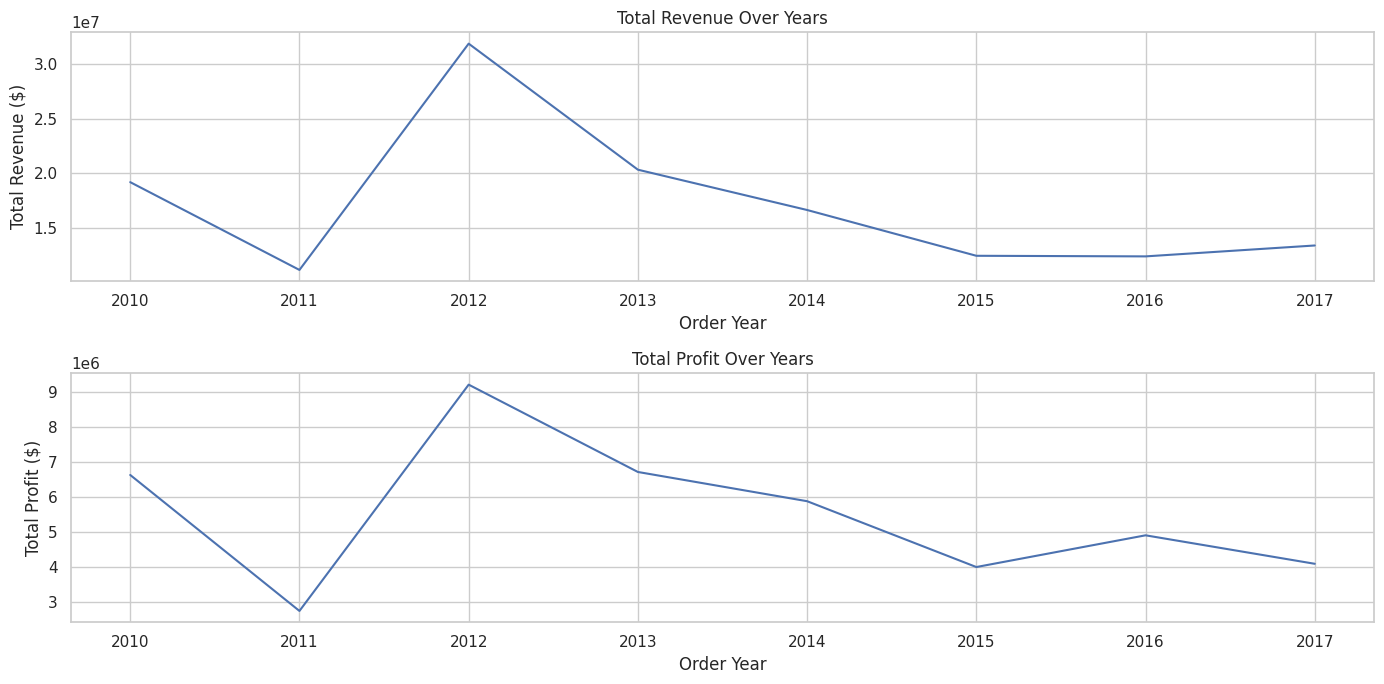

In [ ]:
# Visualising total revenue and total profit over time.

# Set the style of the visualization
sns.set(style="whitegrid")

# Plotting total revenue and total profit over the years
plt.figure(figsize=(14, 7))

# Create a line plot for revenue
plt.subplot(2, 1, 1)
sns.lineplot(data=year_wise_sales.reset_index(), x='Order Year', y='Total Revenue')
plt.title('Total Revenue Over Years')
plt.ylabel('Total Revenue ($)')
plt.xticks(year_wise_sales.index, year_wise_sales.index)

# Create a line plot for profit
plt.subplot(2, 1, 2)
sns.lineplot(data=year_wise_sales.reset_index(), x='Order Year', y='Total Profit')
plt.title('Total Profit Over Years')
plt.ylabel('Total Profit ($)')
plt.xticks(year_wise_sales.index, year_wise_sales.index)

plt.tight_layout()
plt.show()


In [ ]:
year_wise_sales

,Total Revenue,Total Profit
Order Year,,
2010,19186024.92,6629567.43
2011,11129166.07,2741008.23
2012,31898644.52,9213010.12
2013,20330448.66,6715420.04
2014,16630214.43,5879461.68
2015,12427982.86,3996539.44
2016,12372867.22,4903838.01
2017,13373419.63,4089353.45


**Month-Wise Sales Trends**

<ipython-input-136-255b2f6b5f2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_wise_sales.index, y='Total Revenue', data=month_wise_sales.reset_index(), palette='pastel')


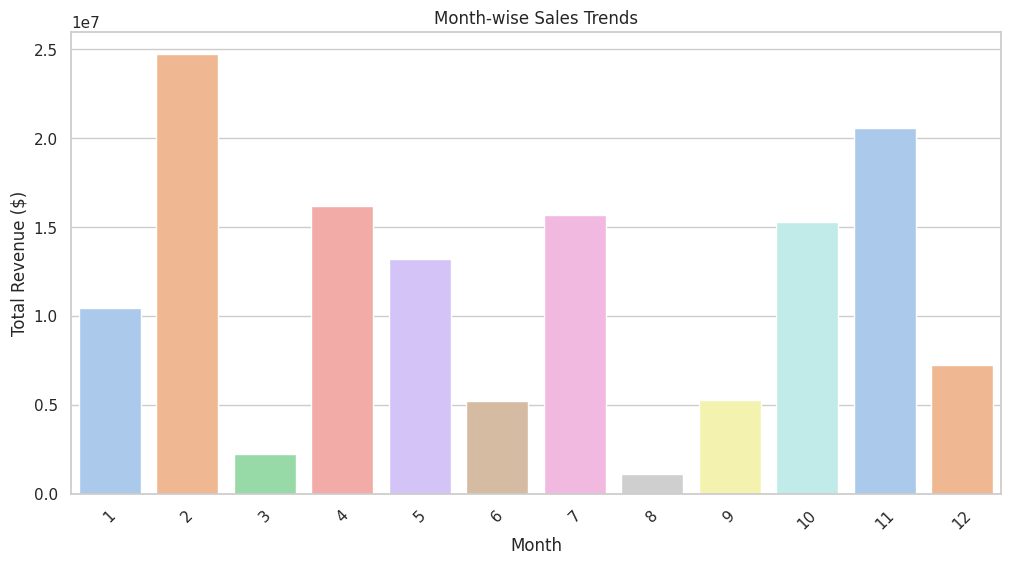

In [ ]:
# Plotting month-wise sales trends
plt.figure(figsize=(12, 6))
sns.barplot(x=month_wise_sales.index, y='Total Revenue', data=month_wise_sales.reset_index(), palette='pastel')
plt.title('Month-wise Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()


**Sales By Region**

<ipython-input-138-2676c87c73bd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_wise_sales.index, y='Total Revenue', data=region_wise_sales.reset_index(), palette=custom_colors)
<ipython-input-138-2676c87c73bd>:4: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=region_wise_sales.index, y='Total Revenue', data=region_wise_sales.reset_index(), palette=custom_colors)


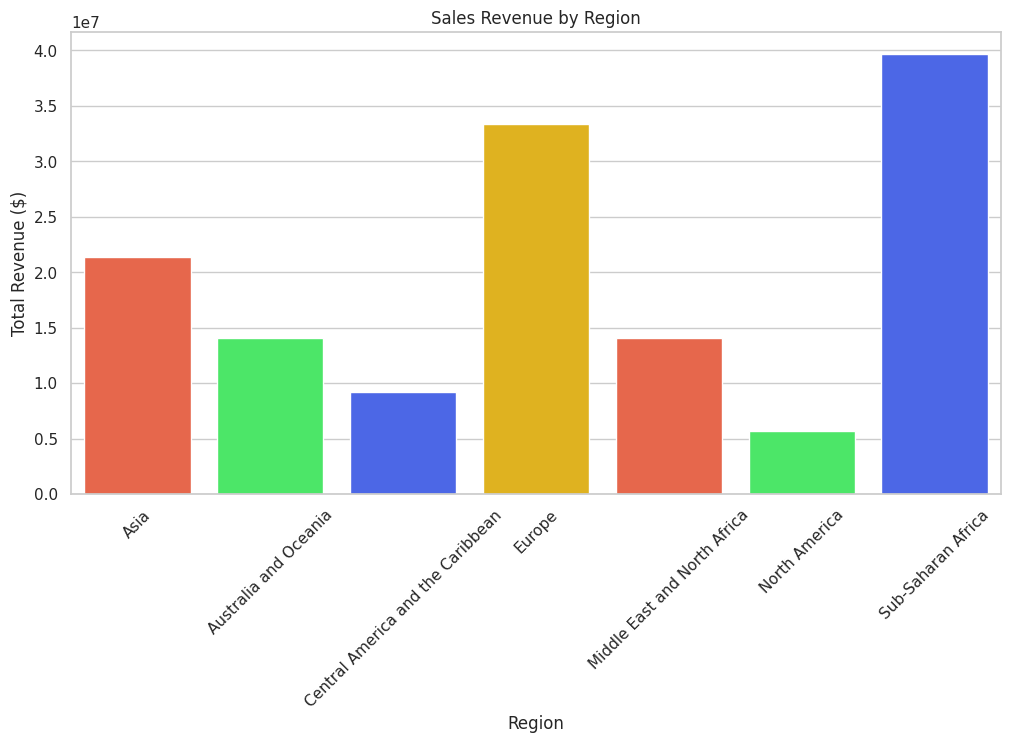

In [ ]:
# Plotting revenue by region
custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#FFC300']
plt.figure(figsize=(12, 6))
sns.barplot(x=region_wise_sales.index, y='Total Revenue', data=region_wise_sales.reset_index(), palette=custom_colors)
plt.title('Sales Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

**Sales By Item Type**

<ipython-input-139-06bbc7b164e1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_type_sales.index, y='Total Revenue', data=item_type_sales.reset_index(), palette=colors[:len(df)])


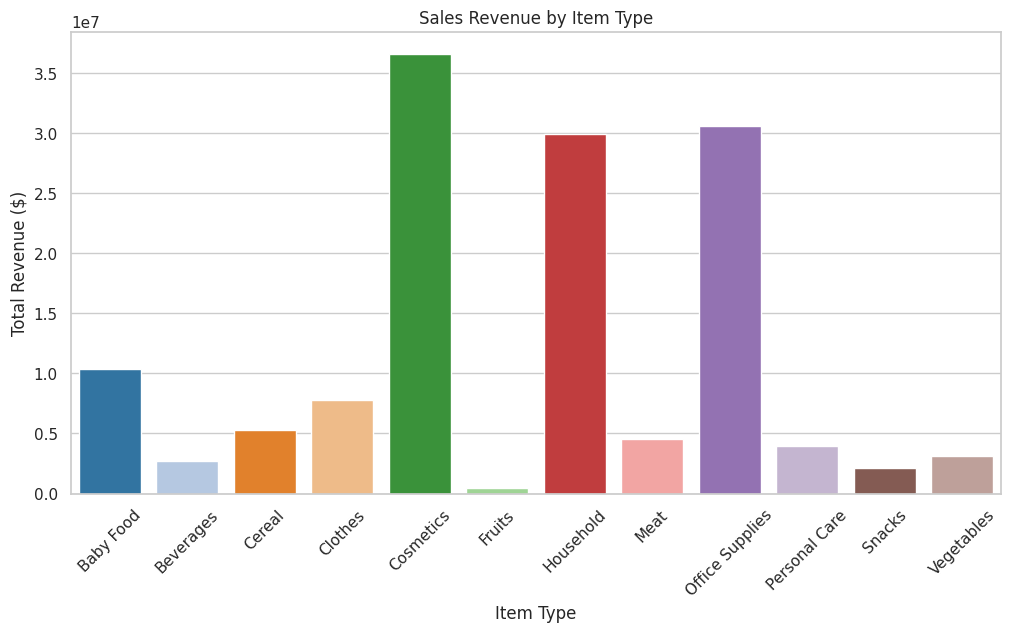

In [ ]:
# Plotting revenue by item type
colors = plt.cm.tab20.colors
plt.figure(figsize=(12, 6))
sns.barplot(x=item_type_sales.index, y='Total Revenue', data=item_type_sales.reset_index(), palette=colors[:len(df)])
plt.title('Sales Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

**Sales Channel Wise**

<ipython-input-153-5fd3b8d53c7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_channel_performance , x='Sales Channel', y='Total Revenue', palette='Set2')


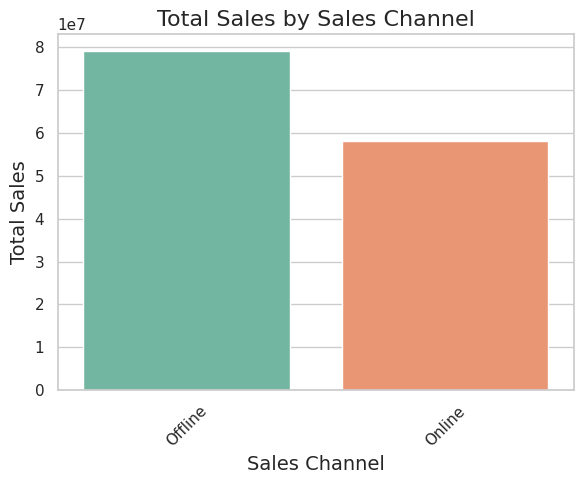

In [ ]:
# Create a bar plot
plt.figure(figsize=(6, 5))
sns.barplot(data=sales_channel_performance , x='Sales Channel', y='Total Revenue', palette='Set2')

# Add titles and labels
plt.title('Total Sales by Sales Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


**Sales Channel Wise Units Sold**

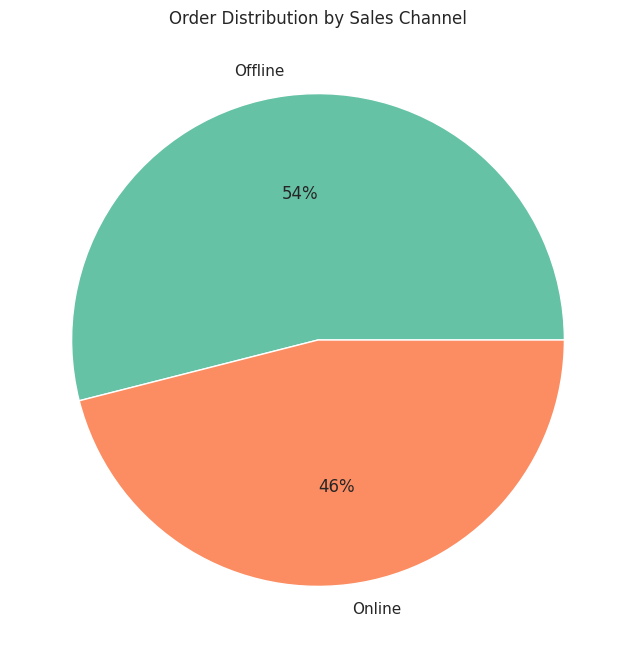

In [ ]:
plt.figure(figsize=(8, 8))

# Use a different colormap
channel_pieplot = plt.pie(Channel_wise_Units['Units Sold (in 1000s)'],
                           labels=Channel_wise_Units['Sales Channel'],
                           autopct='%1.f%%',
                           colors=plt.cm.Set2.colors)  # Changed colormap to Set2

# Add title
plt.title('Order Distribution by Sales Channel')
plt.show()


# **Correlation**

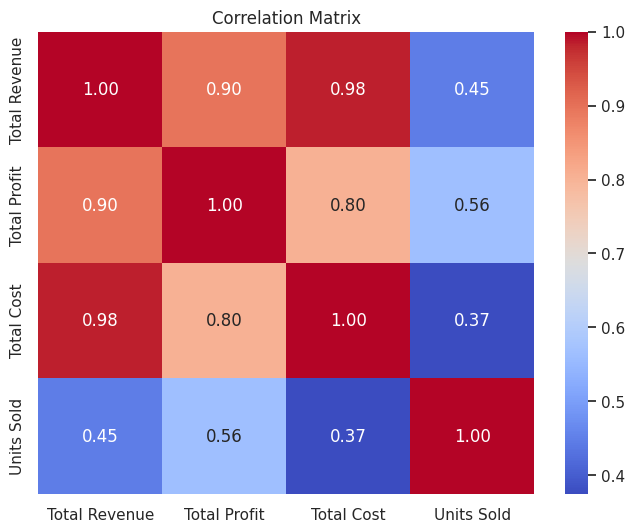

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['Total Revenue', 'Total Profit', 'Total Cost', 'Units Sold']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Key Observations**

**Analysis of the Correlation Matrix**
This correlation matrix examines the relationships between four key metrics: Total Revenue, Total Profit, Total Cost, and Units Sold.

**Total Revenue and Total Profit:**

**Correlation:** 0.90 (Very Strong)
Higher revenue significantly boosts profit, indicating effective sales management can lead to increased profitability.

**Total Revenue and Total Cost:**

**Correlation: 0.98 (Extremely Strong)**
As revenue increases, costs rise nearly in tandem, suggesting that higher sales often incur higher operational costs.

**Total Profit and Total Cost:**

**Correlation: 0.80 (Strong)**
Increased costs correlate with higher profits, though other factors may influence profitability beyond just costs.

**Total Revenue and Units Sold:**

**Correlation: 0.45 (Moderate)**
A moderate correlation indicates that while more units sold typically increase revenue, pricing and promotional strategies also play significant roles.

**Total Profit and Units Sold:**

**Correlation: 0.56 (Moderate)**
Higher unit sales generally lead to higher profits but with moderate strength, suggesting variability in product margins.

**Total Cost and Units Sold:**

**Correlation: 0.37 (Weak)**
A weak correlation shows that unit sales do not strongly predict costs, indicating potential fixed costs or varying product margins.

NameError: name 'yearly_month_wise_sales' is not defined